In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/herb300/train/Pongamia_pinnata a/Pongamia pinnata a (343).jpeg
/kaggle/input/herb300/train/Pongamia_pinnata a/Pongamia pinnata a (88).jpeg
/kaggle/input/herb300/train/Pongamia_pinnata a/Pongamia pinnata a (135).jpg
/kaggle/input/herb300/train/Pongamia_pinnata a/Pongamia pinnata a (297).jpeg
/kaggle/input/herb300/train/Pongamia_pinnata a/Pongamia pinnata a (185).jpeg
/kaggle/input/herb300/train/Pongamia_pinnata a/Pongamia pinnata a (123).jpg
/kaggle/input/herb300/train/Pongamia_pinnata a/Pongamia pinnata a (295).jpeg
/kaggle/input/herb300/train/Pongamia_pinnata a/Pongamia pinnata a (119).jpg
/kaggle/input/herb300/train/Pongamia_pinnata a/Pongamia pinnata a (101).jpg
/kaggle/input/herb300/train/Pongamia_pinnata a/Pongamia pinnata a (71).jpg
/kaggle/input/herb300/train/Pongamia_pinnata a/Pongamia pinnata a (323).jpeg
/kaggle/input/herb300/train/Pongamia_pinnata a/Pongamia pinnata a (126).jpeg
/kaggle/input/herb300/train/Pongamia_pinnata a/Pongamia pinnata a (196).jpeg
/kaggl

In [2]:
import pathlib

# Assuming data_dir is the path to the directory containing subdirectories for each plant class
data_dir = pathlib.Path("/kaggle/input/herb300/train")

# Use glob to get a list of all subdirectories representing plant classes in data_dir
plant_classes = [subdir.name for subdir in data_dir.glob('*') if subdir.is_dir()]

# Initialize an empty dictionary
leaf_images_dict = {}

# Loop through each plant class and populate the dictionary
for plant_class in plant_classes:
    # Use the plant class name as the key and create a list of file paths using glob
    leaf_images_dict[plant_class] = list((data_dir / plant_class).glob('*'))

# Print the number of classes
print(f"Number of classes: {len(plant_classes)}")

# Print the number of images per class
for plant_class, file_paths in leaf_images_dict.items():
    print(f"{plant_class}: {len(file_paths)} images")

Number of classes: 43
Pongamia_pinnata a: 301 images
Alkanet_Root: 301 images
Eclipta_Alba: 301 images
Excoecaria cochinchinensiss: 301 images
Solanum: 301 images
Lonicera_caprifol: 301 images
Prunella_vulgaris: 301 images
Beefsteakk: 301 images
Gotukola: 299 images
Myrica esculentaa: 301 images
leonarus: 301 images
Kamarkas: 301 images
Alpinia_Galangaa: 297 images
Holarrhena antidysenterica: 301 images
Andrographis paniculata: 301 images
Chinese_Yumm: 301 images
Lochnera_rosea: 301 images
Lysimachia: 301 images
Ramiee: 301 images
Phyllanthuss: 301 images
Abelmoschus_sagittifolius: 300 images
Achyranthes_asperaa: 300 images
Indian Bay Leaf: 301 images
Gingerr: 301 images
Abutilon_indicumm: 300 images
Bearde_ iriss: 301 images
Clerodendrum_serratumm: 301 images
Oleander: 301 images
Tulsii: 301 images
Goumi_berries: 301 images
Oriental: 301 images
Artemisia_Argyii: 301 images
Kumis: 301 images
Schefflera heptaphylla: 301 images
Rhodomyrtus: 301 images
Basella_Albaa: 301 images
Euphorbia:

In [3]:
from PIL import Image
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras 
from tensorflow.keras import layers
import PIL
import pathlib
from tensorflow.keras.models import Sequential
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras_tuner
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Embedding
from keras.layers import GlobalAveragePooling2D



In [5]:
def load_data_and_labels(directory_path):
    x, y = [], []

    subdirectories = [d for d in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, d))]

    for class_index, subdir in enumerate(subdirectories):
        class_path = os.path.join(directory_path, subdir)

        for file_name in os.listdir(class_path):
            image_path = os.path.join(class_path, file_name)
            try:
                img = cv2.imread(image_path)
                if img is not None:
                    # Resize image to (32, 32)
                    resized_img = cv2.resize(img, (64, 64))
                    x.append(resized_img)
                    y.append(class_index)
                else:
                    print(f"Error: Unable to read the image {image_path}")
            except Exception as e:
                print(f"Error processing image {image_path}: {str(e)}")

    return np.array(x), np.array(y)

herbdata_path = '/kaggle/input/herb300/train'
x, y = load_data_and_labels(herbdata_path)

# Split the dataset into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Define ImageDataGenerator instances without augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
batch_size = 64
num_classes = len(np.unique(y))
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_val_one_hot = to_categorical(y_val, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

train_generator = train_datagen.flow(x_train, y_train_one_hot, batch_size=batch_size, shuffle=True)
val_generator = val_datagen.flow(x_val, y_val_one_hot, batch_size=batch_size, shuffle=False)
test_generator = test_datagen.flow(x_test, y_test_one_hot, batch_size=batch_size, shuffle=False)

Error: Unable to read the image /kaggle/input/herb300/train/Pongamia_pinnata a/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Alkanet_Root/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Eclipta_Alba/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Excoecaria cochinchinensiss/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Solanum/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Lonicera_caprifol/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Prunella_vulgaris/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Beefsteakk/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Gotukola/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Myrica esculentaa/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/leonarus/desktop.ini
Error: Unable to read the image /kaggle/inpu

libpng warning: iTXt: CRC error
libpng warning: iTXt: CRC error


Error: Unable to read the image /kaggle/input/herb300/train/Indian Bay Leaf/desktop.ini


libpng warning: iTXt: CRC error
Corrupt JPEG data: 5 extraneous bytes before marker 0xee


Error: Unable to read the image /kaggle/input/herb300/train/Gingerr/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Bearde_ iriss/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Clerodendrum_serratumm/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Oleander/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Tulsii/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Goumi_berries/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Oriental/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Artemisia_Argyii/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Kumis/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Schefflera heptaphylla/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Rhodomyrtus/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Basell

In [6]:
print("Number of successfully read images:", len(x))
print("Number of corresponding labels:", len(y))

Number of successfully read images: 12888
Number of corresponding labels: 12888


In [7]:
# Print the shapes of the resulting sets
print("Train set shapes:", x_train.shape, y_train.shape)
print("Validation set shapes:", x_val.shape, y_val.shape)
print("Test set shapes:", x_test.shape, y_test.shape)

Train set shapes: (9021, 64, 64, 3) (9021,)
Validation set shapes: (1933, 64, 64, 3) (1933,)
Test set shapes: (1934, 64, 64, 3) (1934,)


# model-1 

In [8]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout

img_shape = (64, 64, 3)
num_classes = 43

# Uncomment here 
Name = "VGG16"
classifier = VGG16(
    include_top=False,
    input_shape=img_shape,
    weights='imagenet'
)

fine_tune_at = 20
for layer in classifier.layers[:fine_tune_at]:
    layer.trainable = False

model = Sequential()
model.add(classifier)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# ... (previous code)

print(model.summary())

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 batch_normalization (Batch  (None, 2048)              8192      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                         

In [9]:
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_Resnet.h5',
    monitor='val_accuracy',  # Change 'val_acc' to 'val_accuracy'
    mode='max',
    verbose=1
)


model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),  # Remove from_logits=True
    metrics=[
        'accuracy',
        tf.keras.metrics.CategoricalAccuracy(),
    ]
)


history = model.fit(train_generator, epochs=15, validation_data=val_generator, batch_size=batch_size)

Epoch 1/15
141/141 [==============================] - 8s 27ms/step - loss: 2.6163 - accuracy: 0.3389 - categorical_accuracy: 0.3389 - val_loss: 2.2250 - val_accuracy: 0.5054 - val_categorical_accuracy: 0.5054
Epoch 2/15
141/141 [==============================] - 3s 21ms/step - loss: 1.4471 - accuracy: 0.6082 - categorical_accuracy: 0.6082 - val_loss: 1.4684 - val_accuracy: 0.6932 - val_categorical_accuracy: 0.6932
Epoch 3/15
141/141 [==============================] - 3s 20ms/step - loss: 1.0393 - accuracy: 0.7195 - categorical_accuracy: 0.7195 - val_loss: 1.0492 - val_accuracy: 0.7791 - val_categorical_accuracy: 0.7791
Epoch 4/15
141/141 [==============================] - 3s 20ms/step - loss: 0.8063 - accuracy: 0.7842 - categorical_accuracy: 0.7842 - val_loss: 0.8726 - val_accuracy: 0.8210 - val_categorical_accuracy: 0.8210
Epoch 5/15
141/141 [==============================] - 3s 20ms/step - loss: 0.6628 - accuracy: 0.8199 - categorical_accuracy: 0.8199 - val_loss: 0.7908 - val_accurac

In [10]:
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_Resnet.h6',
    monitor='val_accuracy',  # Change 'val_acc' to 'val_accuracy'
    mode='max',
    verbose=1
)


model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),  # Remove from_logits=True
    metrics=[
        'accuracy',
        tf.keras.metrics.CategoricalAccuracy(),
    ]
)


history = model.fit(train_generator, epochs=20, validation_data=val_generator, batch_size=batch_size)

Epoch 1/20
141/141 [==============================] - 5s 22ms/step - loss: 0.2206 - accuracy: 0.9319 - categorical_accuracy: 0.9319 - val_loss: 0.7889 - val_accuracy: 0.8738 - val_categorical_accuracy: 0.8738
Epoch 2/20
141/141 [==============================] - 3s 20ms/step - loss: 0.2002 - accuracy: 0.9393 - categorical_accuracy: 0.9393 - val_loss: 0.8368 - val_accuracy: 0.8810 - val_categorical_accuracy: 0.8810
Epoch 3/20
141/141 [==============================] - 3s 20ms/step - loss: 0.1884 - accuracy: 0.9457 - categorical_accuracy: 0.9457 - val_loss: 0.8645 - val_accuracy: 0.8800 - val_categorical_accuracy: 0.8800
Epoch 4/20
141/141 [==============================] - 3s 20ms/step - loss: 0.1848 - accuracy: 0.9429 - categorical_accuracy: 0.9429 - val_loss: 0.8996 - val_accuracy: 0.8800 - val_categorical_accuracy: 0.8800
Epoch 5/20
141/141 [==============================] - 3s 20ms/step - loss: 0.1738 - accuracy: 0.9456 - categorical_accuracy: 0.9456 - val_loss: 0.8796 - val_accurac

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2

# Callbacks
checkpoint = ModelCheckpoint('best_model.h7', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile Model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'categorical_accuracy']
)

# Model Training
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    batch_size=batch_size,
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/25
141/141 [==============================] - ETA: 0s - loss: 0.1150 - accuracy: 0.9645 - categorical_accuracy: 0.9645
Epoch 1: val_accuracy improved from -inf to 0.88257, saving model to best_model.h7
141/141 [==============================] - 8s 43ms/step - loss: 0.1150 - accuracy: 0.9645 - categorical_accuracy: 0.9645 - val_loss: 1.1477 - val_accuracy: 0.8826 - val_categorical_accuracy: 0.8826
Epoch 2/25
138/141 [============================>.] - ETA: 0s - loss: 0.1031 - accuracy: 0.9681 - categorical_accuracy: 0.9681
Epoch 2: val_accuracy improved from 0.88257 to 0.88567, saving model to best_model.h7
141/141 [==============================] - 5s 38ms/step - loss: 0.1035 - accuracy: 0.9679 - categorical_accuracy: 0.9679 - val_loss: 1.1304 - val_accuracy: 0.8857 - val_categorical_accuracy: 0.8857
Epoch 3/25
141/141 [==============================] - ETA: 0s - loss: 0.1032 - accuracy: 0.9669 - categorical_accuracy: 0.9669
Epoch 3: val_accuracy did not improve from 0.88567
141

In [12]:
# Callbacks
checkpoint = ModelCheckpoint('best_model.h8', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

from tensorflow.keras.callbacks import LearningRateScheduler  # Remove the extra character here

def lr_schedule(epoch):
    if epoch < 10:
        return 0.001
    elif 10 <= epoch < 20:
        return 0.0001
    else:
        return 0.00001

lr_scheduler = LearningRateScheduler(lr_schedule)

# Compile Model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'categorical_accuracy']
)

# Model Training
callbacks = [checkpoint, early_stopping, lr_scheduler]

history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    batch_size=batch_size,
    callbacks=callbacks
)

Epoch 1/25
140/141 [============================>.] - ETA: 0s - loss: 0.1045 - accuracy: 0.9662 - categorical_accuracy: 0.9662
Epoch 1: val_accuracy improved from -inf to 0.88464, saving model to best_model.h8
141/141 [==============================] - 8s 41ms/step - loss: 0.1045 - accuracy: 0.9662 - categorical_accuracy: 0.9662 - val_loss: 1.0537 - val_accuracy: 0.8846 - val_categorical_accuracy: 0.8846 - lr: 0.0010
Epoch 2/25
138/141 [============================>.] - ETA: 0s - loss: 0.0930 - accuracy: 0.9701 - categorical_accuracy: 0.9701
Epoch 2: val_accuracy improved from 0.88464 to 0.88981, saving model to best_model.h8
141/141 [==============================] - 6s 41ms/step - loss: 0.0951 - accuracy: 0.9693 - categorical_accuracy: 0.9693 - val_loss: 1.0454 - val_accuracy: 0.8898 - val_categorical_accuracy: 0.8898 - lr: 0.0010
Epoch 3/25
141/141 [==============================] - ETA: 0s - loss: 0.0984 - accuracy: 0.9684 - categorical_accuracy: 0.9684
Epoch 3: val_accuracy did no

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout

img_shape = (64, 64, 3)
num_classes = 43

# Uncomment here 
Name = "VGG16"
classifier = VGG16(
    include_top=False,
    input_shape=img_shape,
    weights='imagenet'
)

fine_tune_at = 20
for layer in classifier.layers[:fine_tune_at]:
    layer.trainable = False

model = Sequential()
model.add(classifier)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
#model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# ... (previous code)

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_2 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 batch_normalization_3 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 128)              

In [14]:
# Callbacks
#checkpoint = ModelCheckpoint('best_model.h8', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_Resnet.h8',
    monitor='val_accuracy',  # Change 'val_acc' to 'val_accuracy'
    mode='max',
    verbose=1
)


model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(),  # Remove from_logits=True
    metrics=[
        'accuracy',
        tf.keras.metrics.CategoricalAccuracy(),
    ]
)


history = model.fit(train_generator, epochs=15, validation_data=val_generator, batch_size=batch_size)

Epoch 1/15
141/141 [==============================] - 5s 22ms/step - loss: 4.2889 - accuracy: 0.1015 - categorical_accuracy: 0.1015 - val_loss: 3.3996 - val_accuracy: 0.2400 - val_categorical_accuracy: 0.2400
Epoch 2/15
141/141 [==============================] - 3s 20ms/step - loss: 3.2410 - accuracy: 0.2478 - categorical_accuracy: 0.2478 - val_loss: 2.7806 - val_accuracy: 0.3777 - val_categorical_accuracy: 0.3777
Epoch 3/15
141/141 [==============================] - 3s 20ms/step - loss: 2.7443 - accuracy: 0.3413 - categorical_accuracy: 0.3413 - val_loss: 2.3632 - val_accuracy: 0.4868 - val_categorical_accuracy: 0.4868
Epoch 4/15
141/141 [==============================] - 3s 20ms/step - loss: 2.4885 - accuracy: 0.3981 - categorical_accuracy: 0.3981 - val_loss: 2.0987 - val_accuracy: 0.5551 - val_categorical_accuracy: 0.5551
Epoch 5/15
141/141 [==============================] - 3s 20ms/step - loss: 2.2331 - accuracy: 0.4718 - categorical_accuracy: 0.4718 - val_loss: 1.9218 - val_accurac

In [15]:
# Callbacks
checkpoint = ModelCheckpoint('best_model.h9', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile Model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'categorical_accuracy']
)

# Model Training
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    batch_size=batch_size,
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/20
140/141 [============================>.] - ETA: 0s - loss: 1.1243 - accuracy: 0.7671 - categorical_accuracy: 0.7671
Epoch 1: val_accuracy improved from -inf to 0.80238, saving model to best_model.h9
141/141 [==============================] - 8s 41ms/step - loss: 1.1240 - accuracy: 0.7671 - categorical_accuracy: 0.7671 - val_loss: 1.1576 - val_accuracy: 0.8024 - val_categorical_accuracy: 0.8024
Epoch 2/20
138/141 [============================>.] - ETA: 0s - loss: 1.0639 - accuracy: 0.7815 - categorical_accuracy: 0.7815
Epoch 2: val_accuracy improved from 0.80238 to 0.80341, saving model to best_model.h9
141/141 [==============================] - 6s 42ms/step - loss: 1.0627 - accuracy: 0.7820 - categorical_accuracy: 0.7820 - val_loss: 1.1226 - val_accuracy: 0.8034 - val_categorical_accuracy: 0.8034
Epoch 3/20
139/141 [============================>.] - ETA: 0s - loss: 1.0132 - accuracy: 0.7917 - categorical_accuracy: 0.7917
Epoch 3: val_accuracy improved from 0.80341 to 0.81273

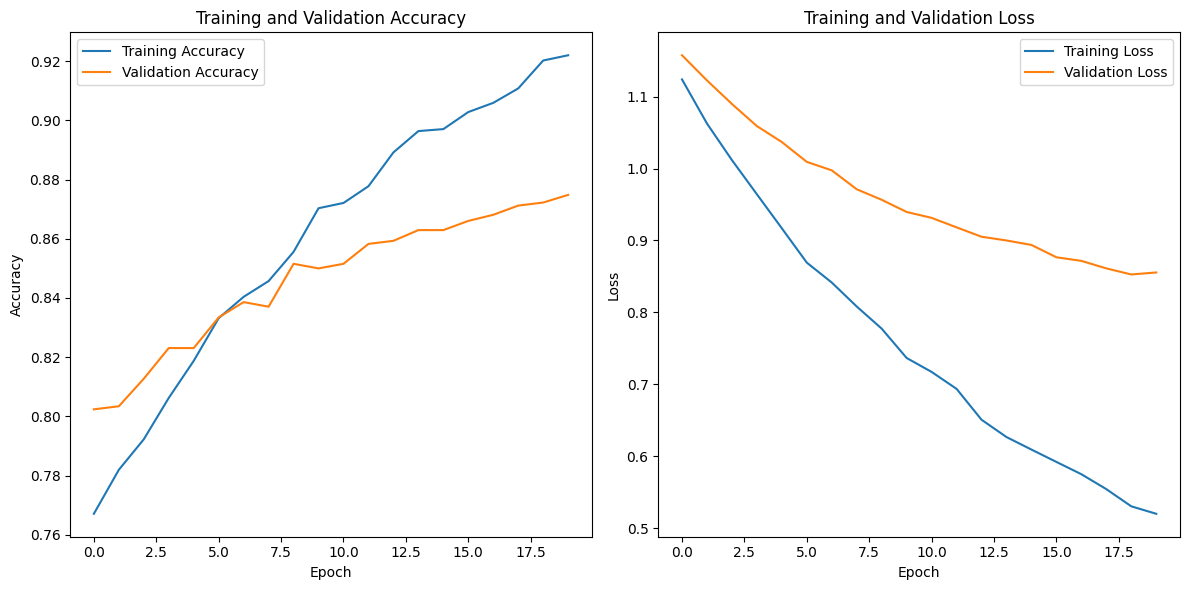

In [16]:
import matplotlib.pyplot as plt

# Plotting the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
# Assuming you have already built and trained your model
# ...

# Evaluate on the test set
test_results = model.evaluate(test_generator)

test_loss = test_results[0]
test_accuracy = test_results[1]

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

31/31 [==============================] - 1s 23ms/step - loss: 0.9170 - accuracy: 0.8599 - categorical_accuracy: 0.8599
Test Loss: 0.9170153141021729
Test Accuracy: 0.8598759174346924


In [18]:
def load_data_and_labels(directory_path):
    x, y = [], []

    subdirectories = [d for d in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, d))]

    for class_index, subdir in enumerate(subdirectories):
        class_path = os.path.join(directory_path, subdir)

        for file_name in os.listdir(class_path):
            image_path = os.path.join(class_path, file_name)
            try:
                img = cv2.imread(image_path)
                if img is not None:
                    # Resize image to (32, 32)
                    resized_img = cv2.resize(img, (128, 128))
                    x.append(resized_img)
                    y.append(class_index)
                else:
                    print(f"Error: Unable to read the image {image_path}")
            except Exception as e:
                print(f"Error processing image {image_path}: {str(e)}")

    return np.array(x), np.array(y)

herbdata_path = '/kaggle/input/herb300/train'
x, y = load_data_and_labels(herbdata_path)

# Split the dataset into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Define ImageDataGenerator instances without augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
batch_size = 64
num_classes = len(np.unique(y))
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_val_one_hot = to_categorical(y_val, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

train_generator = train_datagen.flow(x_train, y_train_one_hot, batch_size=batch_size, shuffle=True)
val_generator = val_datagen.flow(x_val, y_val_one_hot, batch_size=batch_size, shuffle=False)
test_generator = test_datagen.flow(x_test, y_test_one_hot, batch_size=batch_size, shuffle=False)

Error: Unable to read the image /kaggle/input/herb300/train/Pongamia_pinnata a/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Alkanet_Root/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Eclipta_Alba/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Excoecaria cochinchinensiss/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Solanum/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Lonicera_caprifol/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Prunella_vulgaris/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Beefsteakk/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Gotukola/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Myrica esculentaa/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/leonarus/desktop.ini
Error: Unable to read the image /kaggle/inpu

libpng warning: iTXt: CRC error
libpng warning: iTXt: CRC error


Error: Unable to read the image /kaggle/input/herb300/train/Indian Bay Leaf/desktop.ini


libpng warning: iTXt: CRC error
Corrupt JPEG data: 5 extraneous bytes before marker 0xee


Error: Unable to read the image /kaggle/input/herb300/train/Gingerr/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Bearde_ iriss/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Clerodendrum_serratumm/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Oleander/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Tulsii/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Goumi_berries/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Oriental/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Artemisia_Argyii/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Kumis/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Schefflera heptaphylla/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Rhodomyrtus/desktop.ini
Error: Unable to read the image /kaggle/input/herb300/train/Basell

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout

img_shape = (128, 128, 3)
num_classes = 43

# Uncomment here 
Name = "VGG16"
classifier = VGG16(
    include_top=False,
    input_shape=img_shape,
    weights='imagenet'
)

#fine_tune_at = 20
for layer in classifier.layers:
    layer.trainable = False

model = Sequential()
model.add(classifier)
model.add(Flatten())
model.add(BatchNormalization())
#model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# ... (previous code)

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 batch_normalization_4 (Bat  (None, 8192)              32768     
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 128)               1048704   
                                                                 
 batch_normalization_5 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 128)              

In [20]:
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_Resnet.h1',
    monitor='val_accuracy',  # Change 'val_acc' to 'val_accuracy'
    mode='max',
    verbose=1
)


model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),  # Remove from_logits=True
    metrics=[
        'accuracy',
        tf.keras.metrics.CategoricalAccuracy(),
    ]
)


history = model.fit(train_generator, epochs=10, validation_data=val_generator, batch_size=batch_size)

Epoch 1/10
141/141 [==============================] - 13s 69ms/step - loss: 2.0655 - accuracy: 0.4884 - categorical_accuracy: 0.4884 - val_loss: 1.5399 - val_accuracy: 0.7455 - val_categorical_accuracy: 0.7455
Epoch 2/10
141/141 [==============================] - 8s 55ms/step - loss: 0.7100 - accuracy: 0.8271 - categorical_accuracy: 0.8271 - val_loss: 0.8517 - val_accuracy: 0.8551 - val_categorical_accuracy: 0.8551
Epoch 3/10
141/141 [==============================] - 8s 55ms/step - loss: 0.3623 - accuracy: 0.9199 - categorical_accuracy: 0.9199 - val_loss: 0.5825 - val_accuracy: 0.8971 - val_categorical_accuracy: 0.8971
Epoch 4/10
141/141 [==============================] - 8s 55ms/step - loss: 0.2034 - accuracy: 0.9595 - categorical_accuracy: 0.9595 - val_loss: 0.5048 - val_accuracy: 0.9079 - val_categorical_accuracy: 0.9079
Epoch 5/10
141/141 [==============================] - 8s 55ms/step - loss: 0.1330 - accuracy: 0.9755 - categorical_accuracy: 0.9755 - val_loss: 0.5069 - val_accura

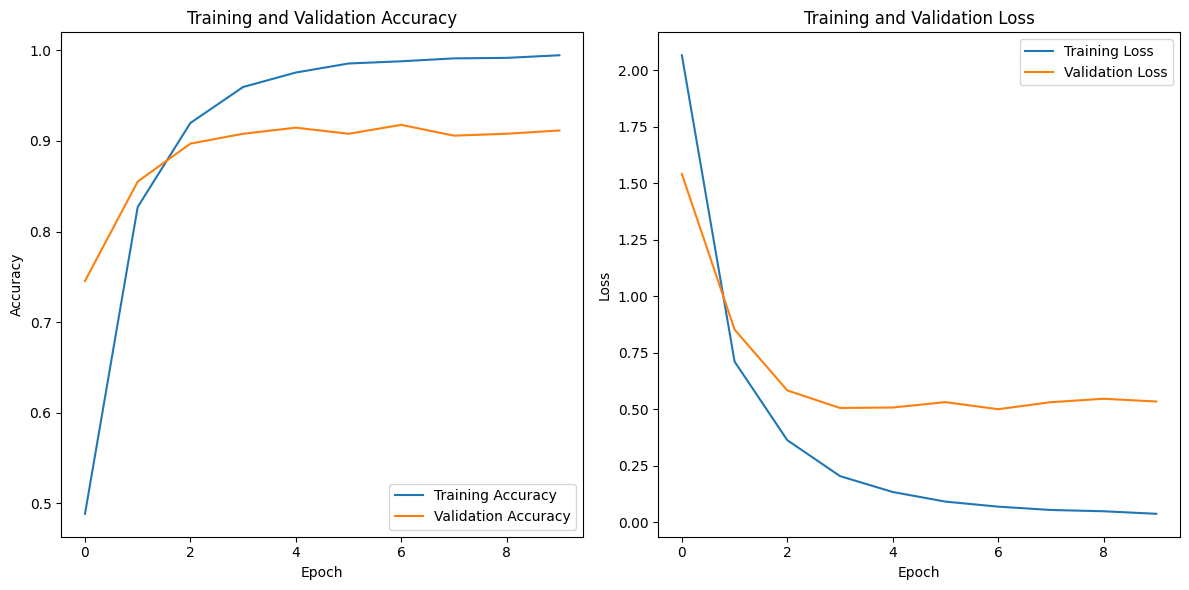

In [21]:
import matplotlib.pyplot as plt

# Plotting the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
# Assuming you have already built and trained your model
# ...

# Evaluate on the test set
test_results = model.evaluate(test_generator)

test_loss = test_results[0]
test_accuracy = test_results[1]

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

31/31 [==============================] - 2s 58ms/step - loss: 0.3288 - accuracy: 0.9173 - categorical_accuracy: 0.9173
Test Loss: 0.32879042625427246
Test Accuracy: 0.9172698855400085


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout

img_shape = (128, 128, 3)
num_classes = 43

# Uncomment here 
Name = "VGG16"
classifier = VGG16(
    include_top=False,
    input_shape=img_shape,
    weights='imagenet'
)

#fine_tune_at = 20
for layer in classifier.layers:
    layer.trainable = False

model = Sequential()
model.add(classifier)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
#model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# ... (previous code)

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 batch_normalization_6 (Bat  (None, 8192)              32768     
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 128)               1048704   
                                                                 
 batch_normalization_7 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 128)              

In [24]:
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_Resnet.h1',
    monitor='val_accuracy',  # Change 'val_acc' to 'val_accuracy'
    mode='max',
    verbose=1
)


model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),  # Remove from_logits=True
    metrics=[
        'accuracy',
        tf.keras.metrics.CategoricalAccuracy(),
    ]
)


history = model.fit(train_generator, epochs=10, validation_data=val_generator, batch_size=batch_size)

Epoch 1/10
141/141 [==============================] - 10s 57ms/step - loss: 2.3211 - accuracy: 0.4879 - categorical_accuracy: 0.4879 - val_loss: 1.8842 - val_accuracy: 0.7294 - val_categorical_accuracy: 0.7294
Epoch 2/10
141/141 [==============================] - 8s 55ms/step - loss: 1.0407 - accuracy: 0.8249 - categorical_accuracy: 0.8249 - val_loss: 1.1541 - val_accuracy: 0.8603 - val_categorical_accuracy: 0.8603
Epoch 3/10
141/141 [==============================] - 8s 55ms/step - loss: 0.7089 - accuracy: 0.9162 - categorical_accuracy: 0.9162 - val_loss: 0.8465 - val_accuracy: 0.8945 - val_categorical_accuracy: 0.8945
Epoch 4/10
141/141 [==============================] - 8s 55ms/step - loss: 0.5522 - accuracy: 0.9528 - categorical_accuracy: 0.9528 - val_loss: 0.7689 - val_accuracy: 0.9136 - val_categorical_accuracy: 0.9136
Epoch 5/10
141/141 [==============================] - 8s 55ms/step - loss: 0.4867 - accuracy: 0.9670 - categorical_accuracy: 0.9670 - val_loss: 0.7593 - val_accura

In [25]:
# Assuming you have already built and trained your model
# ...

# Evaluate on the test set
test_results = model.evaluate(test_generator)

test_loss = test_results[0]
test_accuracy = test_results[1]

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

31/31 [==============================] - 1s 43ms/step - loss: 0.7284 - accuracy: 0.9080 - categorical_accuracy: 0.9080
Test Loss: 0.7283521890640259
Test Accuracy: 0.9079627990722656


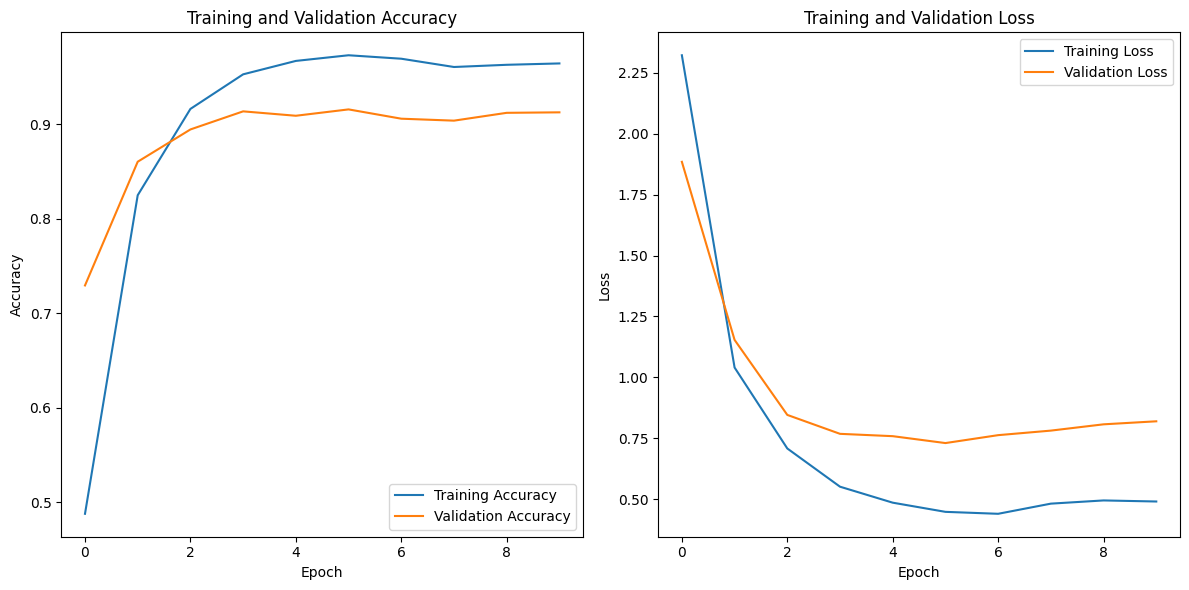

In [26]:
import matplotlib.pyplot as plt

# Plotting the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam


# Compile the model with a lower learning rate
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Define callbacks, including early stopping to prevent overfitting
callback_checkpoint = ModelCheckpoint(
    filepath='best_VGG16.h2',
    monitor='val_accuracy',
    mode='max',
    verbose=1,
    save_best_only=True
)

callback_early_stopping = EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

# Train the model with callbacks
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    batch_size=batch_size,
    callbacks=[callback_checkpoint, callback_early_stopping]
)

Epoch 1/15
141/141 [==============================] - ETA: 0s - loss: 0.4268 - accuracy: 0.9816
Epoch 1: val_accuracy improved from -inf to 0.91930, saving model to best_VGG16.h2
141/141 [==============================] - 13s 76ms/step - loss: 0.4268 - accuracy: 0.9816 - val_loss: 0.7646 - val_accuracy: 0.9193
Epoch 2/15
141/141 [==============================] - ETA: 0s - loss: 0.3761 - accuracy: 0.9909
Epoch 2: val_accuracy improved from 0.91930 to 0.92137, saving model to best_VGG16.h2
141/141 [==============================] - 10s 74ms/step - loss: 0.3761 - accuracy: 0.9909 - val_loss: 0.7310 - val_accuracy: 0.9214
Epoch 3/15
141/141 [==============================] - ETA: 0s - loss: 0.3504 - accuracy: 0.9936
Epoch 3: val_accuracy improved from 0.92137 to 0.92292, saving model to best_VGG16.h2
141/141 [==============================] - 11s 77ms/step - loss: 0.3504 - accuracy: 0.9936 - val_loss: 0.7064 - val_accuracy: 0.9229
Epoch 4/15
140/141 [============================>.] - ETA:

In [28]:
# Assuming you have already built and trained your model
# ...

# Evaluate on the test set
test_results = model.evaluate(test_generator)

test_loss = test_results[0]
test_accuracy = test_results[1]

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

31/31 [==============================] - 1s 43ms/step - loss: 0.5669 - accuracy: 0.9224
Test Loss: 0.5668910145759583
Test Accuracy: 0.9224405288696289


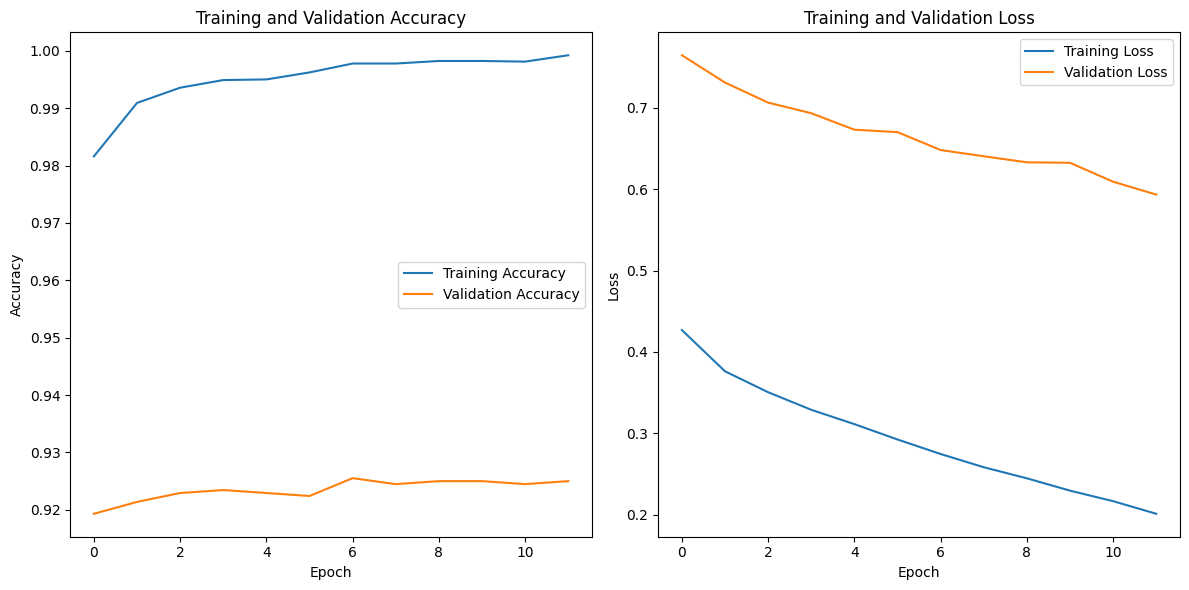

In [29]:
import matplotlib.pyplot as plt

# Plotting the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()